<a href="https://colab.research.google.com/github/Jan12s/betterlifeindex/blob/main/better_life_index_edu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RESEARCH QUESTION: Which external factors impacted education in 2018, and did better education mean people were more satisfied with life?

BETTER LIFE INDEX B

In [ ]:
import pandas as pd

# Step 1: Load the data
url = 'https://raw.githubusercontent.com/Jan12s/betterlifeindex/refs/heads/main/OECD.WISE.WDP%2CDSD_HSL%40DF_HSL_CWB%2C1.1%2BAUS%2BAUT%2BBEL%2BCAN%2BCHL%2BCOL%2BCRI%2BCZE%2BDNK%2BEST%2BFIN%2BFRA%2BDEU%2BGRC%2BHUN%2BISL%2BIRL%2BISR%2BITA%2BJPN%2BKOR%2BLVA%2BLTU%2BLUX%2BMEX%2BNLD%2BNZL%2BNOR%2BPOL%2BPRT%2BSVK%2BSVN%2BESP%2BSWE%2BCHE%2BTUR%2BGBR%2BUSA%2BARG%2BBRA%2BBGR%2BHRV%2BIDN%20(1).csv'
df = pd.read_csv(url)

# Step 2: Keep just what we need
df = df[['REF_AREA', 'TIME_PERIOD', 'MEASURE', 'OBS_VALUE']]
df = df.rename(columns={
    'REF_AREA': 'country',
    'TIME_PERIOD': 'year',
    'MEASURE': 'indicator',
    'OBS_VALUE': 'value'
})

# Step 3: Drop missing values
df = df.dropna(subset=['value'])

# Step 4: Pivot so each indicator becomes a column
df_clean = df.pivot_table(index=['country', 'year'], columns='indicator', values='value').reset_index()

# Step 5: Drop rows with any missing values across indicators
df_clean = df_clean.dropna()

# Show the clean data
print(df_clean.head())
print("Clean data shape:", df_clean.shape)


indicator country  year      11_1       2_4      3_4  3_5         6_1  \
56            AUT  2018  8.002416  9.220276  87.6856  1.6  484.392568   
77            BEL  2018  7.580024  9.429950  83.7276  5.2  492.864439   
245           CZE  2018  7.351978  5.793651  85.7682  2.7  490.218815   
266           DEU  2018  7.358130  6.987309  90.2508  2.7  498.279257   
287           DNK  2018  7.761102  9.061315  90.2963  3.0  501.129934   

indicator    6_1_DEP   6_1_VER         6_2    6_2_DEP   6_2_VER         6_3  \
56         13.512053  1.749492  498.942314  13.512053  1.653118  489.780439   
77         12.488838  1.769670  508.070306  12.488838  1.668829  498.773127   
245        10.515503  1.701419  499.467651  10.515503  1.639396  496.791311   
266        12.815182  1.786301  500.043781  12.815182  1.664745  502.988903   
287         8.142326  1.625112  509.398375   8.142326  1.530610  492.637033   

indicator    6_3_DEP   6_3_VER        7_1   7_1_DEP        9_2  9_3  
56         13.51

In [ ]:
df.head()

,indicator,value,country,year
0,social_support,6.041596,AUS,2016
1,social_support,6.041596,AUS,2015
2,social_support,6.041596,AUS,2014
3,social_support,5.324185,AUS,2013
4,social_support,5.324185,AUS,2012


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3798 entries, 0 to 6742
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   indicator  3798 non-null   object 
 1   value      3798 non-null   float64
 2   country    3798 non-null   object 
 3   year       3798 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 148.4+ KB
None


In [ ]:
print(df['indicator'].unique())


['social_support' 'life_satisfaction' 'education' 'air_pollution'
 'internet_access' 'water_quality']


In [ ]:
df[['indicator', 'value', 'country', 'year']].drop_duplicates().head(20)


,indicator,value,country,year
0,social_support,6.041596,AUS,2016
1,social_support,6.041596,AUS,2015
2,social_support,6.041596,AUS,2014
3,social_support,5.324185,AUS,2013
4,social_support,5.324185,AUS,2012
5,social_support,5.324185,AUS,2011
17,life_satisfaction,98.730392,AUS,2008
18,life_satisfaction,98.261719,AUS,2007
19,life_satisfaction,98.660629,AUS,2006
20,life_satisfaction,98.829361,AUS,2005


In [ ]:
print(df['country'].unique())


['AUS' 'AUT' 'BEL' 'CAN' 'CHL' 'COL' 'CRI' 'CZE' 'DNK' 'EST' 'FIN' 'FRA'
 'DEU' 'GRC' 'HUN' 'ISL' 'IRL' 'ISR' 'ITA' 'JPN' 'KOR' 'LVA' 'LTU' 'LUX'
 'MEX' 'NLD' 'NZL' 'NOR' 'POL' 'PRT' 'SVK' 'SVN' 'ESP' 'SWE' 'CHE' 'TUR'
 'GBR' 'USA' 'ARG' 'BRA' 'BGR' 'HRV' 'IDN' 'PER' 'ROU' 'ZAF' 'THA']


In [ ]:
print(df['indicator'].unique())


['social_support' 'life_satisfaction' 'education' 'air_pollution'
 'internet_access' 'water_quality']


In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/Jan12s/betterlifeindex/refs/heads/main/OECD.WISE.WDP%2CDSD_HSL%40DF_HSL_CWB%2C1.1%2BAUS%2BAUT%2BBEL%2BCAN%2BCHL%2BCOL%2BCRI%2BCZE%2BDNK%2BEST%2BFIN%2BFRA%2BDEU%2BGRC%2BHUN%2BISL%2BIRL%2BISR%2BITA%2BJPN%2BKOR%2BLVA%2BLTU%2BLUX%2BMEX%2BNLD%2BNZL%2BNOR%2BPOL%2BPRT%2BSVK%2BSVN%2BESP%2BSWE%2BCHE%2BTUR%2BGBR%2BUSA%2BARG%2BBRA%2BBGR%2BHRV%2BIDN%20(1).csv"
df = pd.read_csv(url)


df = df.rename(columns={
    'MEASURE': 'indicator',
    'REF_AREA': 'country',
    'TIME_PERIOD': 'year',
    'OBS_VALUE': 'value'
})

df = df[['indicator', 'value', 'country', 'year']]


indicator_map = {
    '11_1': 'education',
    '9_2': 'life_satisfaction',
    '2_4': 'internet_access',
    '3_4': 'air_pollution',
    '3_5': 'water_quality',
    '7_1_DEP': 'social_support',
}

# Filter for your selected indicators only
df = df[df['indicator'].isin(indicator_map.keys())]

# Replace codes with clear names
df['indicator'] = df['indicator'].map(indicator_map)

# Pivot so each indicator becomes a column
df_pivot = df.pivot_table(
    index=['country', 'year'],
    columns='indicator',
    values='value'
).reset_index()

# Drop rows with any missing values
df_clean = df_pivot.dropna()

# Show result
print(df_clean.head())
print("\nShape:", df_clean.shape)


indicator country  year  air_pollution  education  internet_access  \
51            AUT  2013        79.7862   7.810006         8.780428   
56            AUT  2018        87.6856   8.002416         9.220276   
72            BEL  2013        78.6488   7.528975        13.021009   
77            BEL  2018        83.7276   7.580024         9.429950   
152           CHE  2009        73.9000   8.143000         9.546423   

indicator  life_satisfaction  social_support  water_quality  
51                 99.999077        5.323621            2.7  
56                 99.986755        7.208514            1.6  
72                 99.962799        7.539228            5.8  
77                 99.962578        8.764923            5.2  
152                99.943962        6.121666            7.6  

Shape: (57, 8)


In [ ]:
df.shape

(6763, 4)

In [ ]:
df.head(20)

,country,year,indicator,value
0,AUS,2016,7_1_DEP,6.041596
1,AUS,2015,7_1_DEP,6.041596
2,AUS,2014,7_1_DEP,6.041596
3,AUS,2013,7_1_DEP,5.324185
4,AUS,2012,7_1_DEP,5.324185
5,AUS,2011,7_1_DEP,5.324185
6,AUS,2018,6_2_VER,1.640049
7,AUS,2018,6_1_VER,1.795876
8,AUS,2022,6_3_VER,1.777801
9,AUS,2022,6_2_VER,1.727050


In [ ]:
df_wide = df.pivot_table(
    index=['country', 'year'],
    columns='indicator',
    values='value'
).reset_index()

print(df_wide.head())


indicator country  year  11_1  2_4  3_4  3_5  6_1  6_1_DEP  6_1_VER  6_2  \
0             ARG  2004   NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   
1             ARG  2005   NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   
2             ARG  2006   NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   
3             ARG  2007   NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   
4             ARG  2008   NaN  NaN  NaN  NaN  NaN      NaN      NaN  NaN   

indicator  6_2_DEP  6_2_VER  6_3  6_3_DEP  6_3_VER        7_1   7_1_DEP  \
0              NaN      NaN  NaN      NaN      NaN        NaN       NaN   
1              NaN      NaN  NaN      NaN      NaN        NaN       NaN   
2              NaN      NaN  NaN      NaN      NaN  89.013534  9.850904   
3              NaN      NaN  NaN      NaN      NaN  89.013534  9.850904   
4              NaN      NaN  NaN      NaN      NaN  90.156300  8.622396   

indicator        9_2        9_3  
0          99.875931  11.572835  
1          99.875847  14

In [ ]:
df_wide.head(50)

indicator,country,year,11_1,2_4,3_4,3_5,6_1,6_1_DEP,6_1_VER,6_2,6_2_DEP,6_2_VER,6_3,6_3_DEP,6_3_VER,7_1,7_1_DEP,9_2,9_3
0,ARG,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.875931,11.572835
1,ARG,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.875847,14.769807
2,ARG,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.013534,9.850904,99.875565,20.410571
3,ARG,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.013534,9.850904,99.875290,10.670389
4,ARG,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.156300,8.622396,99.875023,14.723009
5,ARG,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.156300,8.622396,99.874763,15.678700
6,ARG,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.156300,8.622396,99.874504,12.856874
7,ARG,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.214418,9.887694,99.874268,11.958667
8,ARG,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.214418,9.887694,99.874039,25.353460
9,ARG,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.214418,9.887694,99.873817,24.002302


In [ ]:
df_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  987 non-null    object 
 1   year     987 non-null    int64  
 2   11_1     238 non-null    float64
 3   2_4      726 non-null    float64
 4   3_4      599 non-null    float64
 5   3_5      593 non-null    float64
 6   6_1      228 non-null    float64
 7   6_1_DEP  82 non-null     float64
 8   6_1_VER  82 non-null     float64
 9   6_2      230 non-null    float64
 10  6_2_DEP  82 non-null     float64
 11  6_2_VER  83 non-null     float64
 12  6_3      230 non-null    float64
 13  6_3_DEP  82 non-null     float64
 14  6_3_VER  83 non-null     float64
 15  7_1      843 non-null    float64
 16  7_1_DEP  843 non-null    float64
 17  9_2      799 non-null    float64
 18  9_3      940 non-null    float64
dtypes: float64(17), int64(1), object(1)
memory usage: 146.6+ KB


RESEARCH QUESTION: Which external factors impact education, and does better education mean people are more satisfied with life?

In [ ]:
indicator_map_wide = {
    '11_1': 'education',
    '2_4': 'internet_access',
    '3_4': 'air_pollution',
    '3_5': 'water_quality',
    '6_1': 'earnings_employment',
    '6_1_DEP': 'earnings_employment_deprivation',
    '6_1_VER': 'earnings_employment_validation',
    '6_2': 'housing_rooms',
    '6_2_DEP': 'housing_deprivation',
    '6_2_VER': 'housing_validation',
    '6_3': 'housing_dwelling_type',
    '6_3_DEP': 'housing_dwelling_type_deprivation',
    '6_3_VER': 'housing_dwelling_type_validation',
    '7_1': 'social_support',
    '7_1_DEP': 'social_support_deprivation',
    '9_2': 'life_satisfaction',
    '9_3': 'life_satisfaction_validation'
}

# Rename columns using the map
df_wide_renamed = df_wide.rename(columns=indicator_map_wide)

# Display the updated DataFrame
display(df_wide_renamed.head())

indicator,country,year,education,internet_access,air_pollution,water_quality,earnings_employment,earnings_employment_deprivation,earnings_employment_validation,housing_rooms,housing_deprivation,housing_validation,housing_dwelling_type,housing_dwelling_type_deprivation,housing_dwelling_type_validation,social_support,social_support_deprivation,life_satisfaction,life_satisfaction_validation
0,ARG,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.875931,11.572835
1,ARG,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.875847,14.769807
2,ARG,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.013534,9.850904,99.875565,20.410571
3,ARG,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.013534,9.850904,99.875290,10.670389
4,ARG,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.156300,8.622396,99.875023,14.723009


In [ ]:
df_wide_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country                            987 non-null    object 
 1   year                               987 non-null    int64  
 2   education                          238 non-null    float64
 3   internet_access                    726 non-null    float64
 4   air_pollution                      599 non-null    float64
 5   water_quality                      593 non-null    float64
 6   earnings_employment                228 non-null    float64
 7   earnings_employment_deprivation    82 non-null     float64
 8   earnings_employment_validation     82 non-null     float64
 9   housing_rooms                      230 non-null    float64
 10  housing_deprivation                82 non-null     float64
 11  housing_validation                 83 non-null     float64

In [25]:
BLIE = df_wide_renamed.copy()
BLIE.head()

indicator,country,year,air_pollution,education,internet_access,life_satisfaction,social_support,water_quality
0,ARG,2004,NaN,NaN,NaN,99.875931,NaN,NaN
1,ARG,2005,NaN,NaN,NaN,99.875847,NaN,NaN
2,ARG,2006,NaN,NaN,NaN,99.875565,9.850904,NaN
3,ARG,2007,NaN,NaN,NaN,99.875290,9.850904,NaN
4,ARG,2008,NaN,NaN,NaN,99.875023,8.622396,NaN


In [27]:
countries_with_nan_education = BLIE[BLIE['education'].isna()]['country'].unique()
print("Countries with NaN in 'education' column:")
print(countries_with_nan_education)

Countries with NaN in 'education' column:
['ARG' 'AUS' 'AUT' 'BEL' 'BGR' 'BRA' 'CAN' 'CHE' 'CHL' 'COL' 'CRI' 'CZE'
 'DEU' 'DNK' 'ESP' 'EST' 'FIN' 'FRA' 'GBR' 'GRC' 'HRV' 'HUN' 'IDN' 'IRL'
 'ISL' 'ISR' 'ITA' 'JPN' 'KOR' 'LTU' 'LUX' 'LVA' 'MEX' 'NLD' 'NOR' 'NZL'
 'PER' 'POL' 'PRT' 'ROU' 'SVK' 'SVN' 'SWE' 'THA' 'TUR' 'USA' 'ZAF']


In [28]:
countries_with_education_value = BLIE[BLIE['education'].notna()]['country'].unique()
print("Countries with a value for 'education' column:")
print(countries_with_education_value)

Countries with a value for 'education' column:
['AUS' 'AUT' 'BEL' 'BGR' 'CAN' 'CHE' 'COL' 'CZE' 'DEU' 'DNK' 'ESP' 'EST'
 'FIN' 'FRA' 'GBR' 'GRC' 'HRV' 'HUN' 'IRL' 'ISL' 'ISR' 'ITA' 'JPN' 'KOR'
 'LTU' 'LUX' 'LVA' 'MEX' 'NLD' 'NOR' 'NZL' 'POL' 'PRT' 'ROU' 'SVK' 'SVN'
 'SWE' 'TUR']


In [29]:
total_countries = BLIE['country'].nunique()
print(f"Total number of countries in the DataFrame: {total_countries}")

Total number of countries in the DataFrame: 47


In [30]:
rows_fully_filled = BLIE.dropna()

print(f"Number of fully filled rows: {rows_fully_filled.shape[0]}")
print("\nFully filled rows:")
display(rows_fully_filled)

Number of fully filled rows: 57

Fully filled rows:


indicator,country,year,air_pollution,education,internet_access,life_satisfaction,social_support,water_quality
51,AUT,2013,79.786200,7.810006,8.780428,99.999077,5.323621,2.7
56,AUT,2018,87.685600,8.002416,9.220276,99.986755,7.208514,1.6
72,BEL,2013,78.648800,7.528975,13.021009,99.962799,7.539228,5.8
77,BEL,2018,83.727600,7.580024,9.429950,99.962578,8.764923,5.2
152,CHE,2009,73.900000,8.143000,9.546423,99.943962,6.121666,7.6
160,CHE,2017,89.637400,7.961846,7.024294,99.888512,5.674874,0.4
162,CHE,2019,95.300215,8.025742,6.305304,99.783203,5.674874,0.3
240,CZE,2013,69.387500,6.879920,9.452591,99.999008,9.280089,6.2
245,CZE,2018,85.768200,7.351978,5.793651,99.999008,8.402266,2.7
261,DEU,2013,84.787800,7.254309,6.884453,99.981911,6.473689,5.3


In [45]:
BLIE = BLIE.dropna()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 56 to 938
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            26 non-null     object 
 1   year               26 non-null     int64  
 2   air_pollution      26 non-null     float64
 3   education          26 non-null     float64
 4   internet_access    26 non-null     float64
 5   life_satisfaction  26 non-null     float64
 6   social_support     26 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.6+ KB


In [46]:
BLIE = BLIE[BLIE['year'] == 2018]
display(BLIE.head(50))

indicator,country,year,air_pollution,education,internet_access,life_satisfaction,social_support
56,AUT,2018,87.6856,8.002416,9.220276,99.986755,7.208514
77,BEL,2018,83.7276,7.580024,9.429950,99.962578,8.764923
140,CAN,2018,88.2000,8.100000,10.006902,89.804497,7.248315
245,CZE,2018,85.7682,7.351978,5.793651,99.999008,8.402266
266,DEU,2018,90.2508,7.358130,6.987309,99.981888,9.980209
287,DNK,2018,90.2963,7.761102,9.061315,99.162529,4.395046
308,ESP,2018,86.1152,7.329371,15.319123,99.298912,7.884422
329,EST,2018,89.2878,7.005767,10.670861,99.814720,6.476210
350,FIN,2018,92.9988,8.106845,9.666667,69.879356,4.536716
371,FRA,2018,81.3062,7.254388,13.178674,99.712212,6.251947


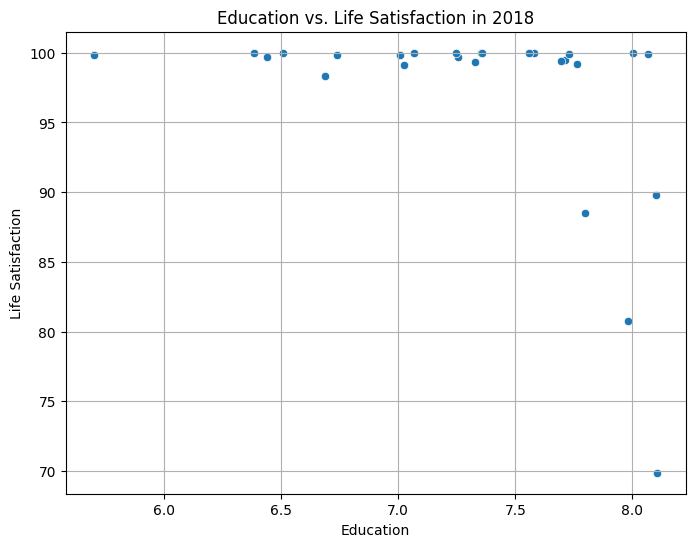

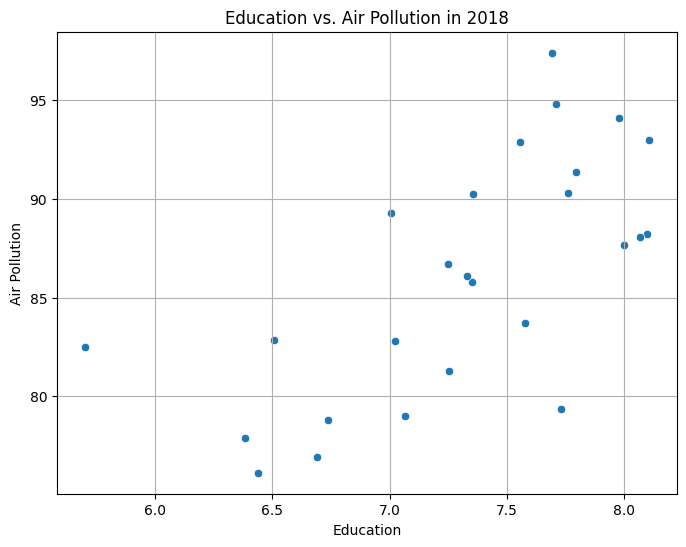

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Education vs Life Satisfaction
plt.figure(figsize=(8, 6))
sns.scatterplot(data=BLIE, x='education', y='life_satisfaction')
plt.title('Education vs. Life Satisfaction in 2018')
plt.xlabel('Education')
plt.ylabel('Life Satisfaction')
plt.grid(True)
plt.show()

# Plot 2: Education vs Air Pollution
plt.figure(figsize=(8, 6))
sns.scatterplot(data=BLIE, x='education', y='air_pollution')
plt.title('Education vs. Air Pollution in 2018')
plt.xlabel('Education')
plt.ylabel('Air Pollution')
plt.grid(True)
plt.show()

**Air Pollution** is measured as average annual concentration of **PM2.5 fine particulate matter** in micrograms per cubic meter (µg/m³). Higher values indicate worse air quality.

**Life Satisfaction** ('9_2') is measured as the **percentage of people aged 15 and over who reported being satisfied with their life**. Higher values indicate greater life satisfaction.

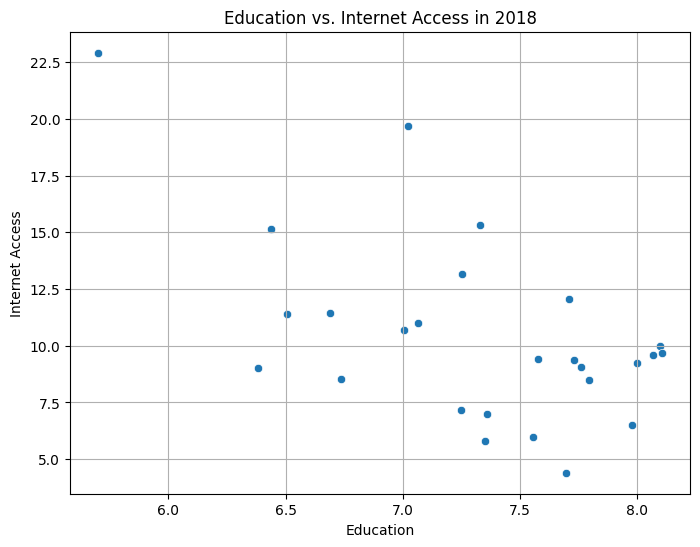

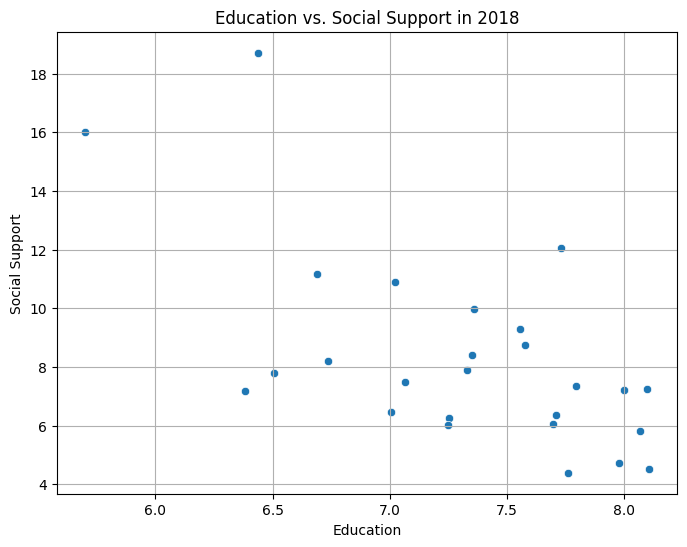

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot: Education vs Internet Access
plt.figure(figsize=(8, 6))
sns.scatterplot(data=BLIE, x='education', y='internet_access')
plt.title('Education vs. Internet Access in 2018')
plt.xlabel('Education')
plt.ylabel('Internet Access')
plt.grid(True)
plt.show()

# Plot: Education vs Social Support
plt.figure(figsize=(8, 6))
sns.scatterplot(data=BLIE, x='education', y='social_support')
plt.title('Education vs. Social Support in 2018')
plt.xlabel('Education')
plt.ylabel('Social Support')
plt.grid(True)
plt.show()

**Internet access** is measured in % of homes in that country that have internet access

**social support** is measured in % of that country's population that reported to have someone to count on in times of trouble

In [53]:
display(BLIE)

indicator,country,year,air_pollution,education,internet_access,life_satisfaction,social_support
56,AUT,2018,87.6856,8.002416,9.220276,99.986755,7.208514
77,BEL,2018,83.7276,7.580024,9.429950,99.962578,8.764923
140,CAN,2018,88.2000,8.100000,10.006902,89.804497,7.248315
245,CZE,2018,85.7682,7.351978,5.793651,99.999008,8.402266
266,DEU,2018,90.2508,7.358130,6.987309,99.981888,9.980209
287,DNK,2018,90.2963,7.761102,9.061315,99.162529,4.395046
308,ESP,2018,86.1152,7.329371,15.319123,99.298912,7.884422
329,EST,2018,89.2878,7.005767,10.670861,99.814720,6.476210
350,FIN,2018,92.9988,8.106845,9.666667,69.879356,4.536716
371,FRA,2018,81.3062,7.254388,13.178674,99.712212,6.251947


In [54]:
# Mapping of country abbreviations to full names (including only countries present in BLIE 2018)
country_map = {
    'AUT': 'Austria',
    'BEL': 'Belgium',
    'CAN': 'Canada',
    'CZE': 'Czech Republic',
    'DEU': 'Germany',
    'DNK': 'Denmark',
    'ESP': 'Spain',
    'EST': 'Estonia',
    'FIN': 'Finland',
    'FRA': 'France',
    'GBR': 'United Kingdom',
    'GRC': 'Greece',
    'HUN': 'Hungary',
    'IRL': 'Ireland',
    'ITA': 'Italy',
    'LTU': 'Lithuania',
    'LUX': 'Luxembourg',
    'LVA': 'Latvia',
    'NLD': 'Netherlands',
    'NOR': 'Norway',
    'POL': 'Poland',
    'PRT': 'Portugal',
    'SVK': 'Slovak Republic',
    'SVN': 'Slovenia',
    'SWE': 'Sweden',
    'TUR': 'Turkey'
}

# Replace country abbreviations with full names
BLIE['country'] = BLIE['country'].map(country_map)

# Display the updated DataFrame
display(BLIE)

indicator,country,year,air_pollution,education,internet_access,life_satisfaction,social_support
56,Austria,2018,87.6856,8.002416,9.220276,99.986755,7.208514
77,Belgium,2018,83.7276,7.580024,9.429950,99.962578,8.764923
140,Canada,2018,88.2000,8.100000,10.006902,89.804497,7.248315
245,Czech Republic,2018,85.7682,7.351978,5.793651,99.999008,8.402266
266,Germany,2018,90.2508,7.358130,6.987309,99.981888,9.980209
287,Denmark,2018,90.2963,7.761102,9.061315,99.162529,4.395046
308,Spain,2018,86.1152,7.329371,15.319123,99.298912,7.884422
329,Estonia,2018,89.2878,7.005767,10.670861,99.814720,6.476210
350,Finland,2018,92.9988,8.106845,9.666667,69.879356,4.536716
371,France,2018,81.3062,7.254388,13.178674,99.712212,6.251947


Lowest air pollution: GREECE (76.12 µg/m³)

Highest air pollution: Netherlands (97.41 µg/m³)

Highest education level: Finland (8.11 avg years of edu)

Lowest education level: Turkey ( 5.70 avg years of edu)

Highest internet access: Turkey (22.92% of homes)

Lowest internet access: Netherlands (4.40% of homes)

Highest Social Support: Greece (18.71% of people reporting to have social support)

Lowest Social Support: Denmark (4.40% of people reporting to have social support)

Luxembourg has the highest life satisfaction (100.00% of population)

Finland has the lowest life satisfaction (69.88% of population)